
![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)

# Perception in Robotics

Summer Semester 2024, Friedrich-Alexander-Universität Erlangen-Nürnberg

# 3. Exercise - Textures

In this exercise, we will combine filters into filter banks, with the objective to extract textures from a sample image from the [Kodak](https://r0k.us/graphics/kodak/) dataset. First, the **OpenCV** functions are used for the filter bank implementation. Then, the filter banks should be implemented without using the **OpenCV** package, solely relying on [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html).

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

## A. Gabor Filter Bank OpenCV

In this exercise, the [Gabor filter bank](https://en.wikipedia.org/wiki/Gabor_filter) should be implemented. The Gabor filter is a linear filter used to analyse textures. The filter bank should cover different orientations and scales. Therefore, use the **OpenCV** function *getGaborKernel* to generate the Gabor kernel. Use 4 different values for *ksize* and *theta* to define the filter bank at different scales and orientions. Then, apply the Gabor filter bank to the grayscale sample image by using the **OpenCV** function *filter2D* with the defined Gabor kernels. Visualize the different filters and the results after applying the filters to the image.

Example: [http://amroamroamro.github.io/mexopencv/opencv/gabor_demo.html](http://amroamroamro.github.io/mexopencv/opencv/gabor_demo.html)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [19]:
# Define reasonable constants for the fixed parameters of the Gabor filter bank.
SIGMA = 5
LMBDA = 0.3
GAMMA = 0
PSI = 0

In [20]:
def get_gabor_filter_bank(ksizes, thetas):
    """ Generates a Gabor filter bank i.e., list of Gabor filters/kernels.
    Args
    ksizes      Kernel sizes (i.e., scales) for the kernels in the filter bank (Array of length N).
    thetas      Orientations of the kernels (Array of length N).

    Returns
    filter_bank Kernels of the Gabor filter bank.
    """
    gabor_filters=[]
    for ksize in ksizes:
        for theta in thetas:
            kernel=cv2.getGaborKernel((ksize,ksize),SIGMA,theta,LMBDA,GAMMA,PSI)
            # plt.imshow(kernel,cmap='gray')
            # plt.title("Kernel  with Orientation= "+ str(theta) + " and ksize= "+ str(ksize))
            # plt.show()
            gabor_filters.append(kernel)
    return gabor_filters
ksizes=[10,20,30,40]
thetas=np.arange(0,np.pi,np.pi/4)
gabor_filters=get_gabor_filter_bank(ksizes,thetas)


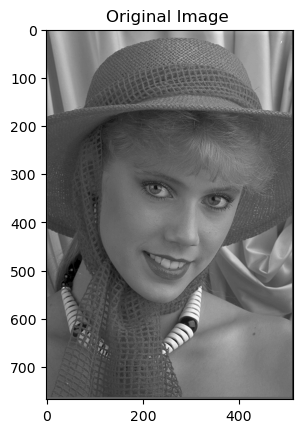

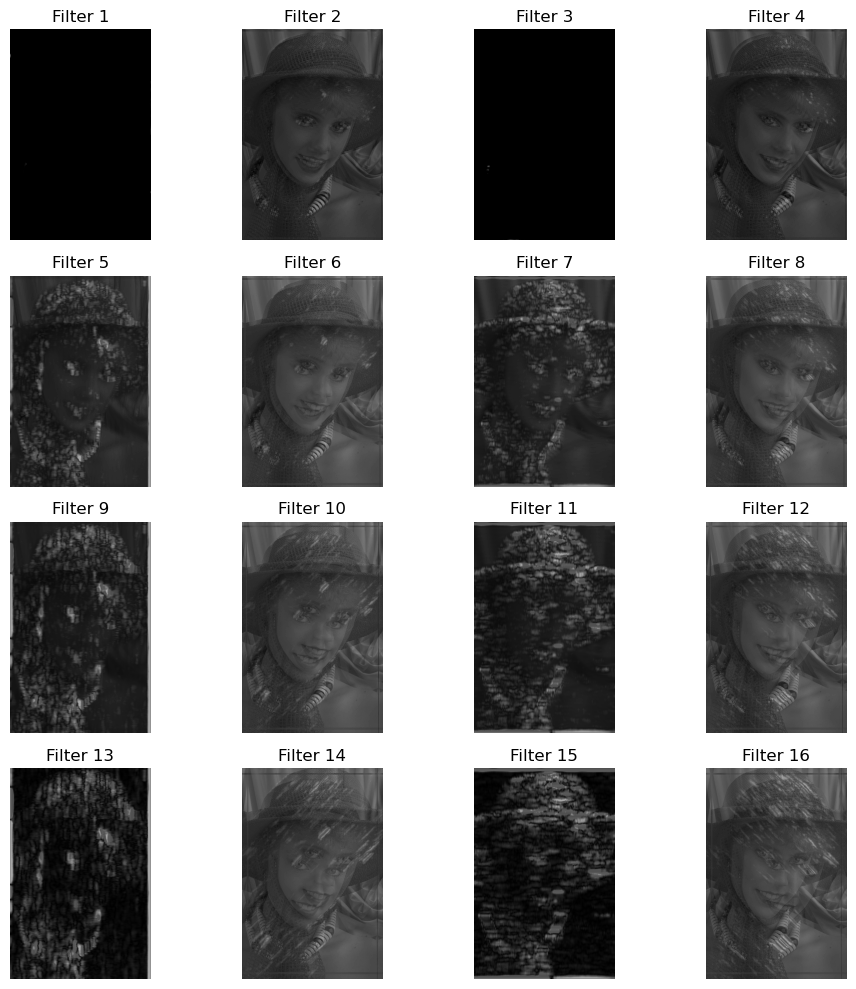

In [21]:
def apply_gabor_filter_bank(filter_bank, img):
    """ Apply the Gabor filter bank.
    Args 
    filter_bank List of filters to apply.
    img         Image to apply filters.

    Returns
    features    Features/Textures extracted by applying the Gabor filter bank.
    """
    features=[]
    for kernel in filter_bank:
        feature=cv2.filter2D(src=img,ddepth=-1,kernel=kernel)
        features.append(feature)
    return features

image=cv2.imread("D:\P_I_R_EXC\IMAGES\kodim04.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("Original Image ")
plt.show()

features=apply_gabor_filter_bank(gabor_filters,image)
fig,axs=plt.subplots(4,4,figsize=(10,10))
for i in range(4):
    for j in range(4):
        index=i*4+j
        ax=axs[i,j]
        ax.imshow(features[index],cmap='gray')
        ax.set_title(f"Filter {index+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()



## B. Gabor Filter Bank 

Now, the Gabor filter bank should be implemented without the **OpenCV** package. Again, visualize the different filters and the results when applied to the grayscale image. You may check your implementation by comparing with the kernels and results from **OpenCV** in A.

**Note:**  The filter has a real and an imaginary component representing orthogonal directions, use the real part for this exercise. Moreover, you may reuse your implementation of the convolution from the previous assignment to perform the filtering. Be aware of potentially different data types of the kernel (e.g., float) and image (e.g., uint8). Furthermore, pixel values might overflow 255. **OpenCV** handles this by clipping values during convolution to the range [0, 255].

In [22]:
def get_gabor_kernel(ksize, sigma, theta, lmbda, gamma, psi):
    """ Gabor feature extraction.
    Args
    ksize   Kernel size.
    sigma   Standard deviation of Gaussian envelope
    theta   Orientation of filter in radians.
    lmbda   Sinusiodal wavelength.
    gamma   Spatial aspect ratio (ellipticity) of the filter.
    psi     Phase offset of the filter in radians. 

    Returns
    gabor_filter Resulting kernel.
    """
    y, x = np.meshgrid(np.arange(-ksize//2 + 1, ksize//2 + 1), np.arange(-ksize//2 + 1, ksize//2 + 1))
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    
    gb = np.exp(-0.5 * (x_theta**2 + (gamma**2) * (y_theta**2)) / (sigma**2)) * np.cos(2 * np.pi * x_theta / lmbda + psi)
    return gb
def get_gabor_filter_bank_wocv(ksizes,thetas):
    gabor_filters=[]
    for ksize in ksizes:
        for theta in thetas:
            kernel=get_gabor_kernel(ksize,SIGMA,theta,LMBDA,GAMMA,PSI)
            gabor_filters.append(kernel)
    return gabor_filters
ksizes=[10,20,30,40]
thetas=np.arange(0,np.pi,np.pi/4)
gabor_filters_wocv=get_gabor_filter_bank_wocv(ksizes,thetas) 


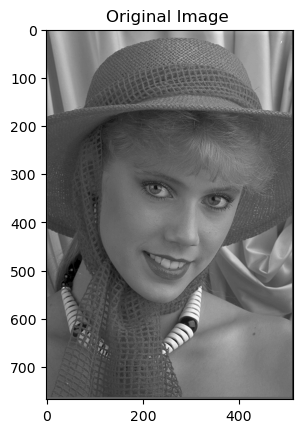

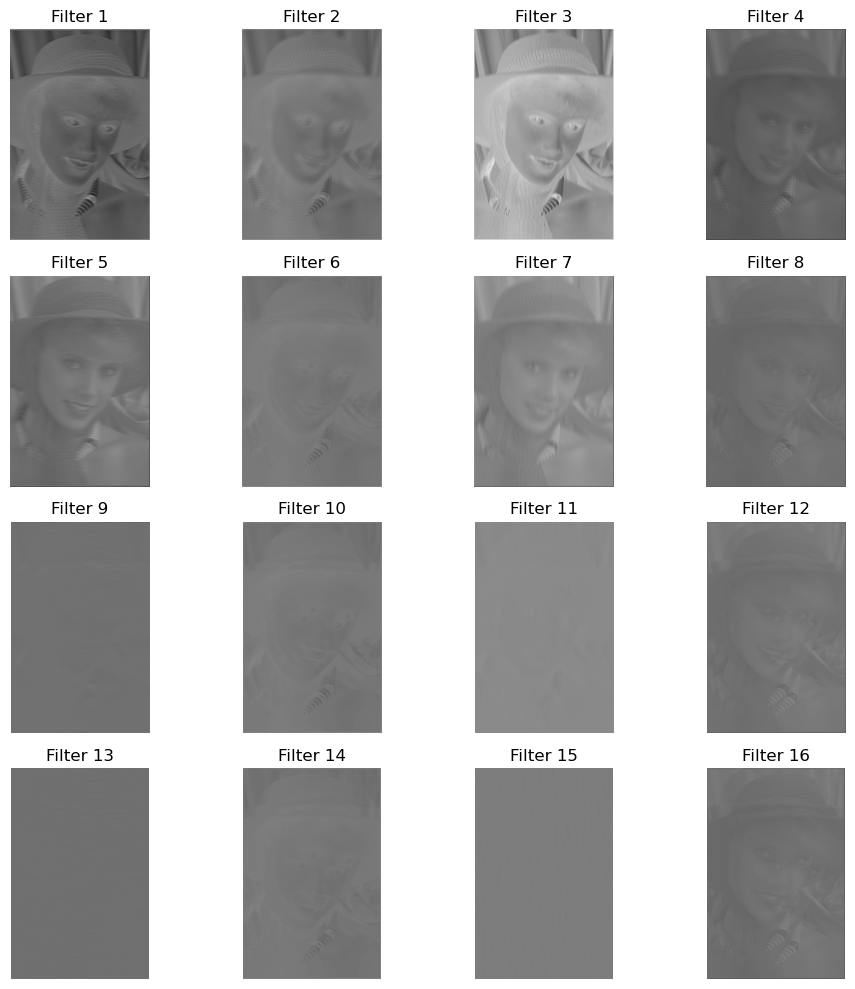

In [7]:
#Convolution function from previous Excercise
def convolve2d(image, kernel):
    """
    Apply a convolution kernel to a 2D image array.

    Parameters:
    image (np.array): 2D array of the image to be convolved.
    kernel (np.array): 2D array of the kernel to be used for convolution.

    Returns:
    out (np.array): 2D array of the convolved image.
    """
    padding=1
    stride=1
    kernel = np.flipud(np.fliplr(kernel))   #Cross Correlation to the kernel
    x_kernel, y_kernel=kernel.shape[0],kernel.shape[1]
    x_image,y_image=image.shape[0],image.shape[1]
    x_output=int((((x_image+2*padding-x_kernel)/stride)+1))
    y_output=int((((y_image+2*padding-y_kernel)/stride)+1))
    output_image=np.zeros((x_output,y_output))
    padded_image=np.pad(image,padding,mode='constant',constant_values=(0))
    for y in range(y_output):
        for x in range(x_output):
            x_start = x * stride
            y_start = y * stride
            x_end = x_start + x_kernel
            y_end = y_start + y_kernel
            output_image[x, y] = (kernel * padded_image[x_start:x_end, y_start:y_end]).sum()

    return output_image

def apply_gabor_kernel_wocv(filter_bank,img):
    features=[]
    for kernel in filter_bank:
        feature=convolve2d(img,kernel)
        features.append(feature)
    return features
  
image=cv2.imread("D:\P_I_R_EXC\IMAGES\kodim04.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("Original Image ")
plt.show()
print(image.shape)

features_wocv=apply_gabor_kernel_wocv(gabor_filters_wocv,image)
fig,axs=plt.subplots(4,4,figsize=(10,10))
for i in range(4):
    for j in range(4):
        index=i*4+j
        ax=axs[i,j]
        ax.imshow(features_wocv[index],cmap='gray')
        ax.set_title(f"Filter {index+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()

## C. Leung-Malik Filter Bank 

In this exercise, the [Leung-Malik](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf) filter bank should be implemented. The Leung-Malik filter bank contains 48 filters of different scales and orientations. It consists of first and second order derivatives of [Gaussians](https://mathworld.wolfram.com/GaussianFunction.html) at 6 orientations and 3 scales. Use $\sigma \in \left\{\sqrt{2}, 2\sqrt{2}, 3\sqrt{2} \right\}$ and $\theta \in \left\{0, \frac{\pi}{6}, \frac{2\pi}{6}, \frac{3\pi}{6}, \frac{4\pi}{6}, \frac{5\pi}{6} \right\}$ to define the filter bank at different scales and orientations, together with an elongation factor of 3 (i.e., $\sigma_x = \sigma$ and $\sigma_y = 3\sigma_x$). 
Furthermore, it encompasses 4 symmetric Gaussians (i.e., no elongation factor) with scales $\sigma$ and
8 [Laplacian of Gaussian (LoG)](https://en.wikipedia.org/wiki/Blob_detection#The_Laplacian_of_Gaussian) filters with $\sigma \in \left\{\sqrt{2}, 2\sqrt{2}, 3\sqrt{2}, 4\sqrt{2}\right\}$ and $3 \sigma$.

Finally, apply the Leung-Malik filter bank to the grayscale sample image. Visualize the different filters and the results when the filters are applied to the image.   

Example: [https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html](https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html)

In [23]:
#1D Gaussian Function
def gaussian_1d(sigma,mean,x,ord):
    x=np.array(x)
    x_=x-mean
    var=sigma**2
    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))
    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

#2D Gaussian Function
def gaussian_2d(Sup,scales):
    var=scales*scales
    shape=(Sup,Sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g

#Laplacian of Gaussian Function
def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h

def makefilter(scale, phasex, phasey, pts, sup):
    gx = gaussian_1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian_1d(scale,   0, pts[1,...], phasey)
    image = gx*gy
    image = np.reshape(image,(sup,sup))
    return image


def get_lm_filter_bank(scales, thetas):
    """ Generates a Leung-Malik filter bank.
    Args
    scales      Kernel sizes (i.e., scales) for the kernels in the filter bank (Array of length 3).
    thetas      Orientations of the first and second order derivative Gaussian kernel (Array of length 6).

    Returns
    filter_bank Kernels of the Leung-Malik filter bank.
    """
    Sup=49                      #Support of the largest filter (must be odd)
    n_orient=len(thetas)        #No.of Orientations
    n_rotinv=12                 #No.of Rotationally Invariant Filters
    n_bar=len(scales)*n_orient  #No.of Bar Filters
    n_edge=len(scales)*n_orient #No.ef Edge Filters
    NF=n_bar+n_edge+n_rotinv    # Total No. of Filters
    F= np.zeros([Sup,Sup,NF])
    h_sup=(Sup-1)/2
    x = [np.arange(-h_sup, h_sup + 1)]
    y = [np.arange(-h_sup, h_sup + 1)]
    [x,y]=np.meshgrid(x,y)
    org_pts = [x.flatten(), y.flatten()]
    org_pts = np.array(org_pts)
    count=0
    for scale_index in range(len(scales)):
        for theta in thetas:
            c=np.cos(theta)
            s=np.sin(theta)
            rot_pts = [[c + 0, -s + 0], [s + 0, c + 0]]
            rot_pts = np.array(rot_pts)
            rot_pts = np.dot(rot_pts, org_pts)
            F[:, :, count] = makefilter(scales[scale_index], 0, 1, rot_pts, Sup)
            F[:, :, count + n_edge] = makefilter(scales[scale_index], 0, 2, rot_pts, Sup)
            count = count + 1
    count = n_bar + n_edge
    scales = np.append(scales,[np.sqrt(2)*4])

    for i in range(len(scales)):
        F[:, :, count] = gaussian_2d(Sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:, :, count] = log2d(Sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:, :, count] = log2d(Sup, 3 * scales[i])
        count = count + 1

    return F
scales=np.sqrt(2)*np.array([1,2,3])
thetas=[(np.pi*i)/6 for i in range(6)]
F=get_lm_filter_bank(scales,thetas)


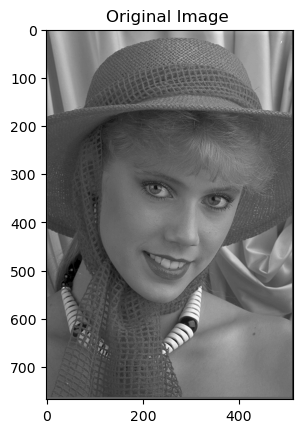

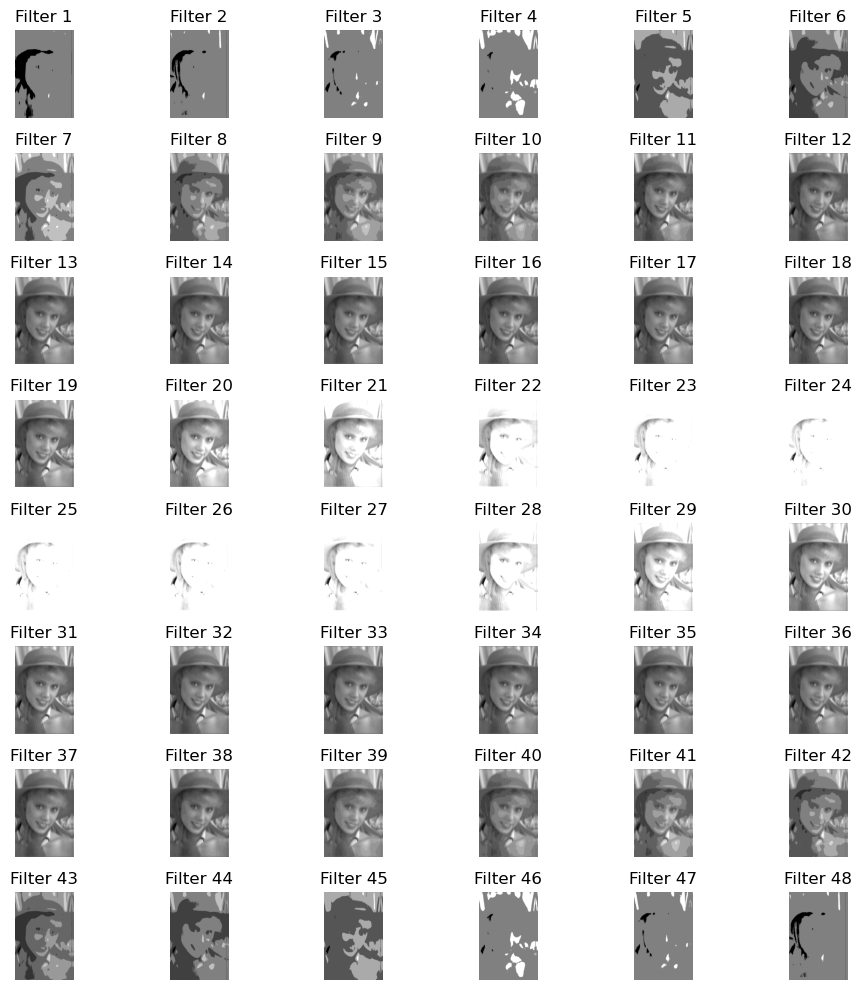

In [17]:
def apply_lm_filter_bank(filter_bank, img):
    """ Apply the Leung-Malik filter bank.
    Args 
    filter_bank List of filters to apply.
    img         Image to apply filters.

    Returns
    features    Features/Textures extracted by applying the Leung-Malik filter bank.
    """
    features=[]
    for kernel in filter_bank:
        feature=cv2.filter2D(src=img,ddepth=-1,kernel=kernel)
        features.append(feature)
    return features

image=cv2.imread("D:\P_I_R_EXC\IMAGES\kodim04.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("Original Image ")
plt.show()
features=apply_lm_filter_bank(F,image)

fig,axs=plt.subplots(8,6,figsize=(10,10))
for i in range(8):
    for j in range(6):
        index=i*6+j
        ax=axs[i,j]
        ax.imshow(features[index],cmap='gray')
        ax.set_title(f"Filter {index+1}")
        ax.axis('off')
plt.tight_layout()
plt.show()

From Filters 1-18 ---> **1D Gaussian Filter** \
From Filters 19-36 ---> **2D Gaussian Filter** \
From Filters 36-48 ---> **Gaussian and Laplacian Filter**